# Pyber Data Analysis
Completed March 2019, by Chief Data Analyst

### Observable Trends
Key trends observed in the data are as follows:

- 80.9% of drivers drive in urban cities (compared with 16.5% and 2.6% of drivers driving in suburban and rural cites, respectively). However, these urban drivers receive only 62.7% of fares (as compared to 30.5% and 6.6% of fares received by drivers in suburban and rural cities). This implies that, on average, the fare per driver is lower in urban cities than in rural and suburban cities. Some possible reasons for this could be that a higher percent of drivers in urban areas chose to drive part time, or pricing in urban areas is lower.
- Further, urban drivers provide 68.3% of rides while only 62.7% of fares, whereas suburban and rural cities give 26.3% and 5.3% respectively of rides, while receiving 30.5% and 6.6% respectively of fares. This implies that on average, a driver in an urban area received less fare per ride. This could be due to many factors including for instance urban city rides being shorter on average, or differences in ride pricing.
- In rural cities, there are typically fewer drivers and fewer rides, but the average fare per drive is higher (USD 35 +/- 10); whereas in urban cities, there often many more drivers and rides, but the average fare per drive is lower (USD 20 to 30). However, there seems to much more variability in average fare per ride between different rural cities than between urban cities.


In [161]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_file = "city_data.csv"
ride_data_file = "ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_file)
city_data.head()
ride_data = pd.read_csv(ride_data_file)
ride_data.head()

# Combine the data into a single dataset
merged_data= pd.merge(ride_data, city_data, on="city", how="left")

# Display the data table for preview
merged_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


### Bubble Plot of Ride Sharing Data

In [162]:
# INSTRUCTIONS: Obtain the x and y coordinates for each of the three city types

# 1.0 Group data by 'type' and 'city'
grouped_merged_data = merged_data.groupby(["type","city"])

# 1.1 Summarise group data by the average fare
ride_share_data = grouped_merged_data[["fare"]].mean()

# 1.2 Append count of ride ID's to the dataframe
ride_share_data["ride count"] = grouped_merged_data[["ride_id"]].count()

# 1.3 Append count of drivers to the dataframe
ride_share_data["driver count"] = grouped_merged_data[["driver_count"]].min()

#ride_share_data.head()

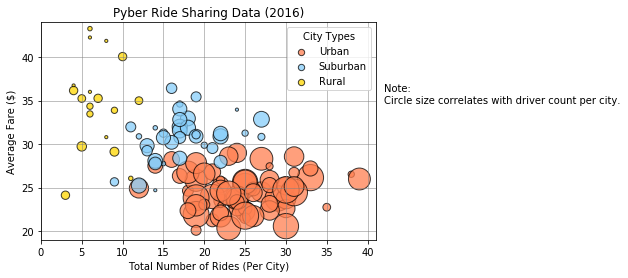

In [163]:
# Build the scatter plots for each city types

colors = ['coral', 'lightskyblue', 'gold']
citytype = list(merged_data["type"].unique())

for i in range(len(citytype)):
    c = colors[i] 
    t = citytype[i]

    plt.scatter(ride_share_data.loc[[t], ["city","ride count"]],
                ride_share_data.loc[[t], ["city","fare"]],  
                facecolors= c, edgecolors="black", alpha=0.75,
                label = t,
                marker= "o", linewidth=1, 
                s= (ride_share_data.loc[[t], ["driver count"]])*10)
    

lgnd = plt.legend(title="City Types", loc="upper right",)
                            
lgnd.legendHandles[0]._sizes = [40]
lgnd.legendHandles[1]._sizes = [40]
lgnd.legendHandles[2]._sizes = [40]

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(color='grey', linestyle='-', linewidth=.5,)
plt.ylim(ymin=19, ymax=44)
plt.xlim(xmin=0, xmax=41)

# Incorporate a text label regarding circle size
plt.figtext(.92, 0.6, 'Note:' + '\n' +'Circle size correlates with driver count per city.')

# Save Figure
plt.savefig(".Pyber_Ride_Sharing_Data_(2016).png")

# Show plot
plt.show()

### Total Fares by City Type

In [164]:
# Calculate Type Percents

# 2.0 Append a sum of the fares by city to the grouped dataframe
ride_share_data["fare total"] = grouped_merged_data[["fare"]].sum()
ride_share_data_0 = ride_share_data.reset_index("city")

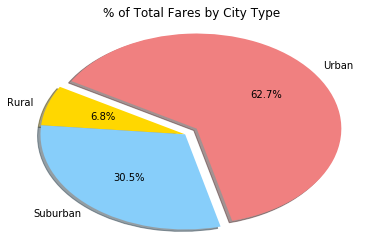

In [165]:
citytype = list(merged_data["type"].unique())
citytype.sort()
cityfare = []

for i in range(len(citytype)):
    cityfare.append(ride_share_data_0.loc[citytype[i],"fare total"].sum())

# build pie chart
explode = (0, 0, 0.1)
colors = ['gold', 'lightskyblue', 'lightcoral']
    
plt.pie(cityfare, explode=explode, labels=citytype, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, frame=False)

plt.title("% of Total Fares by City Type")
plt.axis("auto")


# Save image and print the final product to the screen
plt.savefig(".%_of_Total_Fares_by_City_Type.png")
plt.show()

### Total Rides by City Type

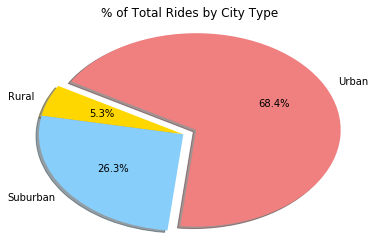

In [166]:
# Calculate Ride Percents
cityrides = []

for i in range(len(citytype)):
    cityrides.append(ride_share_data_0.loc[citytype[i],"ride count"].sum())

# build pie chart
explode = (0, 0, 0.1)
colors = ['gold', 'lightskyblue', 'lightcoral']
    
plt.pie(cityrides, explode=explode, labels=citytype, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, frame=False)

plt.title("% of Total Rides by City Type")
plt.axis("auto")


# Save image and print the final product to the screen
plt.savefig(".%_of_Total_Rides_by_City_Type.png")
plt.show()

### Total Drivers by City Type

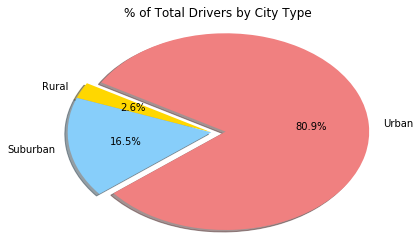

In [167]:
# Calculate Driver Percents
citydrivers = []

for i in range(len(citytype)):
    citydrivers.append(ride_share_data_0.loc[citytype[i],"driver count"].sum())

# build pie chart
explode = (0, 0, 0.1)
colors = ['gold', 'lightskyblue', 'lightcoral']
    
plt.pie(citydrivers, explode=explode, labels=citytype, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150, frame=False)

plt.title("% of Total Drivers by City Type")
plt.axis("auto")


# Save image and print the final product to the screen
plt.savefig(".%_of_Total_Drivers_by_City_Type.png")
plt.show()